In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

In [4]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


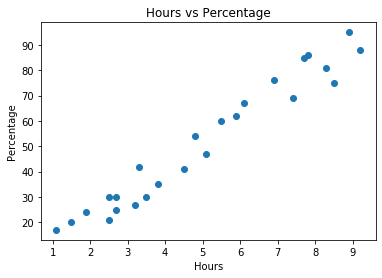

In [8]:
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [23]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [25]:
print(X_train.shape)

(20, 1)


In [26]:
print(y_train.shape)

(20,)


In [27]:
from sklearn.linear_model import LinearRegression  
Lr=LinearRegression()
Lr.fit(X_train,y_train)
print("Training Complete")

Training Complete


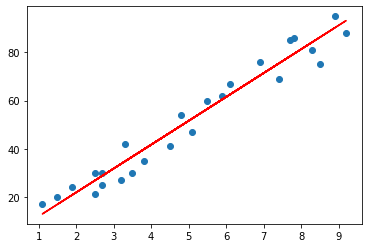

In [28]:
line=Lr.coef_*X+Lr.intercept_

plt.scatter(data['Hours'],data['Scores'])
plt.plot(X,line,color='red')
plt.show()

In [29]:
#Training Score
Lr.score(X_train,y_train)

0.9515510725211553

In [33]:
y_pred=Lr.predict(X_test)

In [34]:
#Test Score
Lr.score(X_test,y_test)

0.9454906892105356

In [36]:
hrs=9.25
test=np.array([hrs])
test = test.reshape(-1, 1)
ans=Lr.predict(test)

In [42]:
print("NO of hours",hrs)
print("Predicted Score",ans[0] )

NO of hours 9.25
Predicted Score 93.69173248737538


In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Figure size 360x360 with 0 Axes>

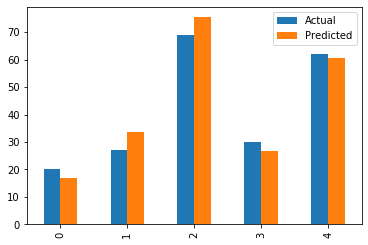

In [51]:
fig=plt.figure(figsize=(5,5))
df.plot(kind='bar')

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
